In [23]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import pickle
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import dataframe_image as dfi


import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib notebook

In [24]:
df = pd.read_csv('../Dataset/pump_features.csv').drop('file_name',axis=1)

In [25]:
scaler = StandardScaler()
df_1 = pd.DataFrame(scaler.fit_transform(df.iloc[:,:-1]),columns = df.columns[:-1])
df_1['class'] = df['class']
df_1

,y_min,y_max,y_mean,y_std,zcr_mean,zcr_min,zcr_max,spec_cent_min,spec_cent_mean,spec_roll_min,spec_roll_mean,rms_mean,flat_mean,flat_max,amp_mean,amp_min,melspec_mean,melspec_std,class
0,-0.050810,-0.192147,0.052489,-0.650002,-0.159171,-0.339640,-0.281324,-0.331233,-0.199542,-0.470735,-0.239537,-0.686359,-0.193493,-0.550890,-0.578642,-0.929297,-0.441489,-0.460999,0
1,0.404248,0.269163,0.504218,-0.352714,-0.209540,0.010696,-0.531491,-0.342864,-0.191904,-0.517866,-0.096477,-0.348038,-0.003672,-0.060842,-0.273951,-0.012664,-0.264236,-0.445496,0
2,0.472492,-0.407882,-0.078147,-0.527468,-0.471552,-0.959466,-0.471928,-0.437785,-0.047963,-0.070122,0.346676,-0.538496,-0.133025,-0.455601,-0.530595,-0.344870,-0.360034,-0.248305,0
3,-0.701627,0.471065,0.357754,-0.033585,0.102576,-0.366589,0.099883,-0.019245,0.301896,0.118402,0.376961,-0.020249,0.315157,-0.430271,0.249002,-0.347846,-0.106662,-0.291684,0
4,0.512990,-0.524004,0.249105,-0.680640,0.001439,-0.204895,-0.114546,0.202206,0.367343,0.377622,0.544869,-0.713887,0.440709,0.937040,-0.648959,-0.604424,-0.458409,-0.373897,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4200,0.289301,0.011509,0.977959,0.391308,-1.059735,-0.555232,-1.484509,-1.238590,-1.558064,-1.177699,-1.771273,0.450822,-1.249287,-0.758287,0.516093,1.328225,0.294588,0.002920,1
4201,0.451919,-0.388654,1.052879,-0.145669,-0.611961,-0.663028,-1.079476,-0.363440,-0.622360,-0.494300,-0.671984,-0.136654,-0.827289,-1.144689,-0.171982,0.460209,-0.091095,-0.093661,1
4202,0.301019,-0.511834,1.034171,-0.399835,-0.860883,-0.743875,-1.246254,-0.914334,-1.159176,-1.012740,-1.373140,-0.397244,-0.983445,-0.451649,-0.499640,-0.594952,-0.268259,-0.292638,1
4203,-0.066212,0.430031,-0.170957,1.117003,-0.832077,-0.447436,-1.198603,-0.934101,-1.303141,-1.048089,-1.525524,1.227007,-1.121380,-0.178961,1.127224,0.663481,0.866890,0.097025,1


Text(0.5, 1.0, 'Feature Correlation Map')

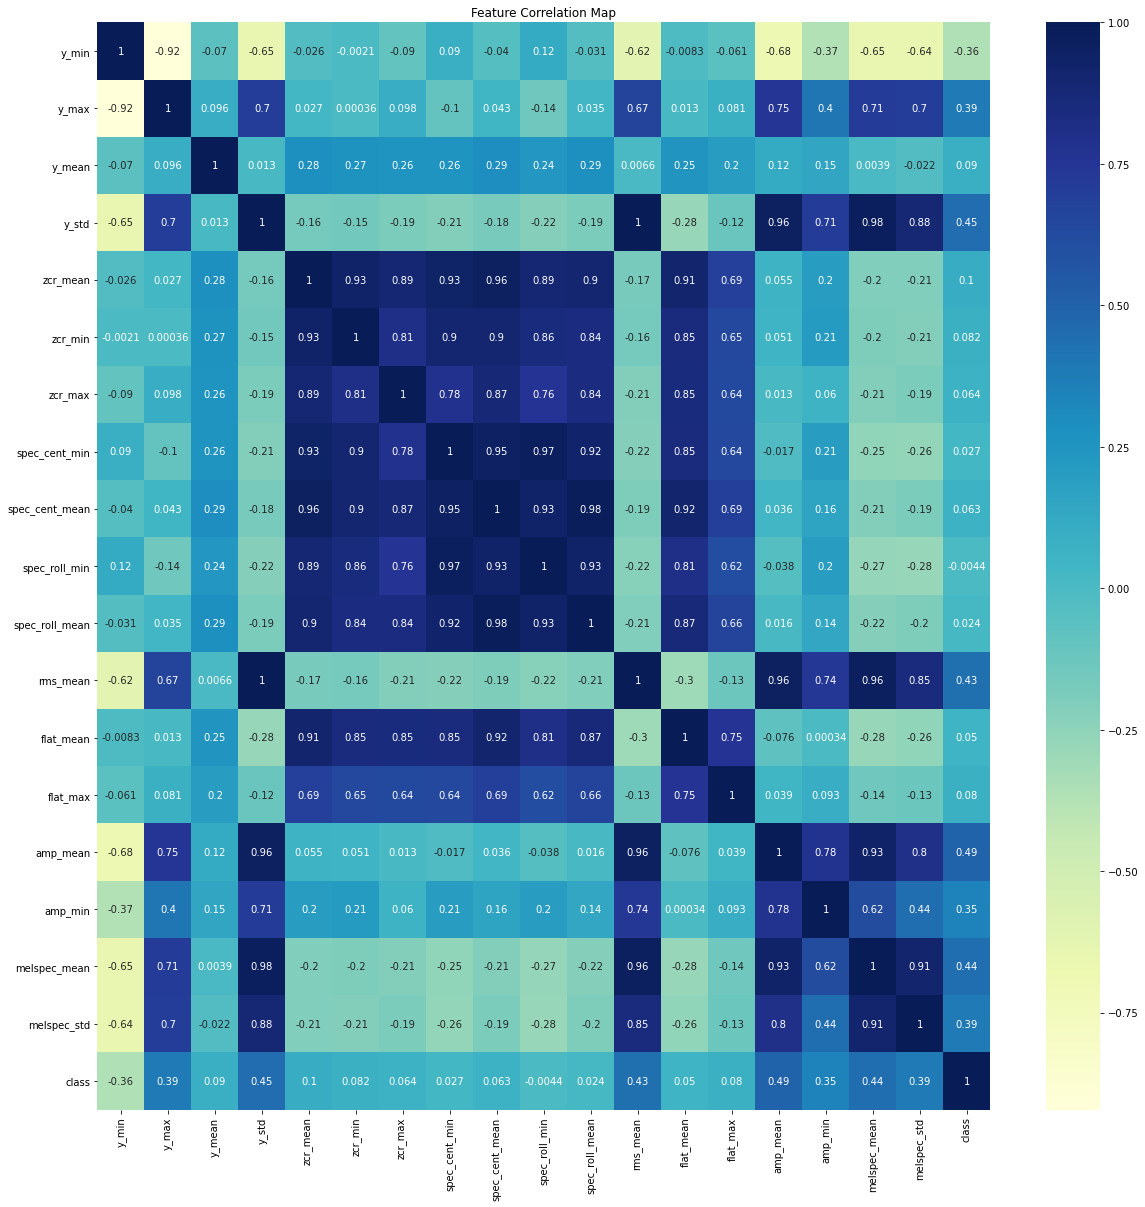

In [26]:
%matplotlib inline
plt.figure(figsize=(20, 20))
sns.heatmap(df_1.corr(),cmap="YlGnBu", annot=True)
plt.title("Feature Correlation Map")

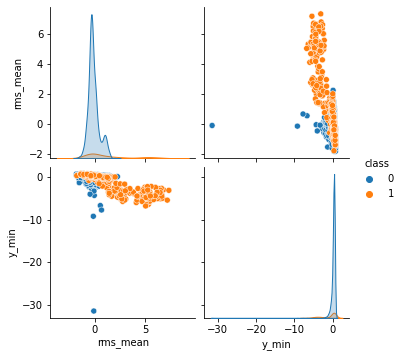

In [27]:
sns.pairplot(df_1.loc[:,[
       'rms_mean', 'y_min', 'class']],hue='class')
plt.savefig('pump_pairplot_melspec_mean_std.jpg')

In [28]:
X = df_1.loc[:,['rms_mean', 'y_min','class']]

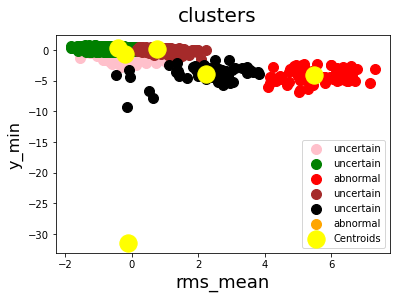

In [29]:
kmeans = KMeans(n_clusters=6, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X.iloc[:,:-1])
fig = plt.figure()
plt.scatter(X.values[y_kmeans == 0, 0], X.values[y_kmeans == 0, 1], s=100,c='pink',label='uncertain')
plt.scatter(X.values[y_kmeans == 1, 0], X.values[y_kmeans == 1, 1], s=100,c='green',label='uncertain')
plt.scatter(X.values[y_kmeans == 2, 0], X.values[y_kmeans == 2, 1], s=100,c='red',label='abnormal')
plt.scatter(X.values[y_kmeans == 3, 0], X.values[y_kmeans == 3, 1], s=100,c='brown',label='uncertain')
plt.scatter(X.values[y_kmeans == 4, 0], X.values[y_kmeans == 4, 1], s=100,c='black',label='uncertain')
plt.scatter(X.values[y_kmeans == 5, 0], X.values[y_kmeans == 5, 1], s=100,c='orange',label='abnormal')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s=300,c='yellow',label='Centroids')


fig.suptitle('clusters', fontsize=20)
plt.xlabel(X.columns[0], fontsize=18)
plt.ylabel(X.columns[1], fontsize=16)
plt.legend()
plt.savefig('pump_normal_abnormal_clusters_2D.jpg')    


In [30]:
pd.Series(y_kmeans).value_counts()


1    2756
3     808
0     501
2      81
4      58
5       1
dtype: int64

In [31]:
X1 = X.values[y_kmeans == 2, 0].reshape(-1,1)
X2 = X.values[y_kmeans == 2, 1].reshape(-1,1)
ones = np.ones((len(X1),1))
X3 = X.values[y_kmeans == 2, 2].reshape(-1,1)
cluster_abnormal_df = pd.DataFrame(np.hstack((X1,X2,X3,ones)),columns=
                                   ['rms_mean','y_min','actual_class','pred_class'])
cluster_abnormal_df


,rms_mean,y_min,actual_class,pred_class
0,6.411501,-4.275881,1.0,1.0
1,6.466147,-5.059654,1.0,1.0
2,6.246848,-4.899687,1.0,1.0
3,6.413674,-4.914755,1.0,1.0
4,4.094037,-5.988178,1.0,1.0
...,...,...,...,...
76,5.437686,-4.002290,1.0,1.0
77,5.492420,-4.457051,1.0,1.0
78,5.198736,-2.264265,1.0,1.0
79,4.862316,-3.303533,1.0,1.0


In [32]:
print(cluster_abnormal_df)
dfi.export(cluster_abnormal_df.head(8), 'pump_cluster_abnormal_df.png')

    rms_mean     y_min  actual_class  pred_class
0   6.411501 -4.275881           1.0         1.0
1   6.466147 -5.059654           1.0         1.0
2   6.246848 -4.899687           1.0         1.0
3   6.413674 -4.914755           1.0         1.0
4   4.094037 -5.988178           1.0         1.0
..       ...       ...           ...         ...
76  5.437686 -4.002290           1.0         1.0
77  5.492420 -4.457051           1.0         1.0
78  5.198736 -2.264265           1.0         1.0
79  4.862316 -3.303533           1.0         1.0
80  5.228418 -3.060132           1.0         1.0

[81 rows x 4 columns]


<IPython.core.display.Javascript object>


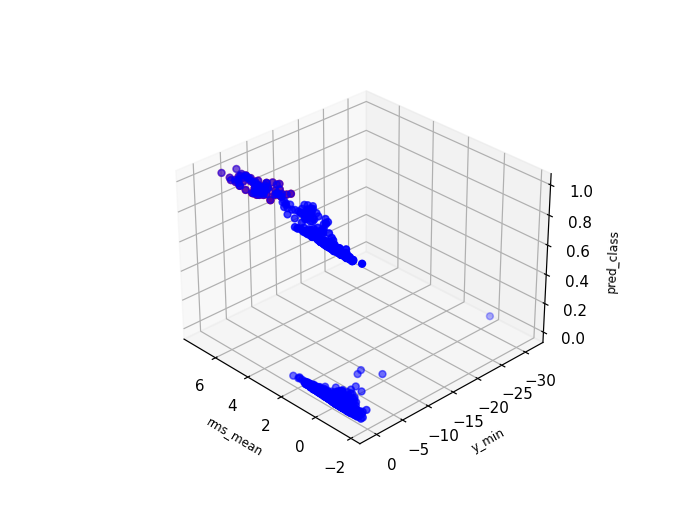

MovieWriter imagemagick unavailable; using Pillow instead.


In [33]:
#from mpl_toolkits import mplot3d
%matplotlib notebook

fig = plt.figure()
ax = plt.axes(projection='3d')



zdata = X.iloc[:,-1]
xdata = X.iloc[:,0]
ydata = X.iloc[:,1]
ax.set_xlabel(X.columns[0], fontsize=8)
ax.set_ylabel(X.columns[1], fontsize=8)
ax.set_zlabel('pred_class', fontsize=8)

ax.scatter3D(xdata, ydata, zdata,c='blue');


zdata = cluster_abnormal_df.iloc[:,-1]
xdata = cluster_abnormal_df.iloc[:,0]
ydata = cluster_abnormal_df.iloc[:,1]
ax.scatter3D(xdata, ydata, zdata,c='red');

def rotate(angle):
    ax.view_init(azim=angle)

rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(120, 300,1), interval=100)
rot_animation.save('pump_cluster_abnormal_normal_3D.gif', dpi=80, writer='imagemagick')

In [36]:
pd.Series(y_kmeans).value_counts()
y_kmeans = pd.Series(y_kmeans).replace(1,0).replace(3,0).replace(4,0).replace(5,0).replace(2,1)
rand_score = metrics.rand_score(df['class'], y_kmeans)



0    4124
1      81
dtype: int64

In [37]:
rand_score = pd.DataFrame([rand_score],columns = ['rand_Score'],index = ['rms_mean/y_min'])
dfi.export(rand_score, 'pump_rand_score.jpg')